# <center><u>NLP Assignment - 3</u></center>

#### Name: Mankada Batul Abbas <br> Enroll no. : SE23MAID010 <br> M.Tech - AI & DS

# Table of Contents

1. [Data Loading and Preprocessing](#data-loading-and-preprocessing)
2. [Word2Vec Training](#word2vec-training)
3. [FastText Model Training](#fasttext-model-training)
4. [Processing Test Data](#processing-test-data)
5. [Building Word2Vec Model](#building-word2vec-model)
    - [Data Preparation](#data-preparation)
    - [Model Architecture](#model-architecture)
    - [Training and Validation](#training-and-validation)
    - [Model Evaluation](#model-evaluation)
6. [Building FastText Model](#building-fasttext-model)
    - [Data Preparation](#data-preparation-fasttext)
    - [Model Architecture](#model-architecture-fasttext)
    - [Training and Validation](#training-and-validation-fasttext)
    - [Model Evaluation](#model-evaluation-fasttext)
7. [Conclusion](#conclusion)


<a id='data-loading-and-preprocessing'></a>
##  Data Loading and Preprocessing

In this section, we'll load the movie review dataset and preprocess the text data for further analysis. We'll perform the following steps:

1. Import necessary libraries.
2. Define a function to preprocess text data.
3. Load the dataset from the specified folder paths.
4. Preprocess the text data by tokenizing, lowercasing, removing punctuation and stopwords, and lemmatizing the words.
5. Save the preprocessed data to a CSV file for further use.


In [1]:
import os
import re
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if not already downloaded
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    # Tokenize the text into words
    text = re.sub(r'<[^>]*>', '', text)
    words = word_tokenize(text)
    
    # Convert words to lowercase
    words = [word.lower() for word in words]
    
    # Remove punctuation
    words = [word for word in words if word not in string.punctuation]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the words back into a single string
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

# Path to the folder containing the files
folder_paths = ['data/train/neg', 'data/train/pos']

# Initialize an empty list to store the preprocessed corpus
preprocessed_corpus = []

# Loop through all folders
for folder_path in folder_paths:
    label = os.path.basename(folder_path)  # Extract label from folder name
    # Loop through all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a text file
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            # Open the file and read its content
            with open(file_path, 'r', encoding='utf-8') as file:
                # Read the content
                text = file.read()
                # Preprocess the text
                preprocessed_text = preprocess_text(text)
                # Append the preprocessed text and label to the corpus
                preprocessed_corpus.append({'text': preprocessed_text, 'label': label})

# Create a DataFrame from the preprocessed corpus list
preprocessed_df = pd.DataFrame(preprocessed_corpus)

# Optionally, you can shuffle the DataFrame
preprocessed_df = preprocessed_df.sample(frac=1).reset_index(drop=True)

preprocessed_df.to_csv('data/train_data.csv')

# Display the DataFrame
print(preprocessed_df.head())

                                                text label
0  wow movie horrible 'm glad n't pay money see h...   neg
1  finest achievement georg wilhelm pabst 's soci...   pos
2  film quite entertaining horror anthology film ...   pos
3  complaint 've heard film really come one thing...   pos
4  ahh talespin say n't already said great show n...   pos


<a id='word2vec-training'></a>
## Word2Vec Training

In this section, we'll train a Word2Vec model on the preprocessed text data. We'll perform the following steps:

1. Tokenize the preprocessed text to prepare it for training.
2. Train a Word2Vec model using the tokenized text data with the specified parameters:
   - Vector size: 100
   - Window size: 5
   - Skip-gram (sg) mode: 1 (use skip-gram architecture)
   - Number of negative samples: 5
   - Minimum word count: 1
   - Number of workers: 4
3. Save the trained Word2Vec model for later use.
4. Optionally, load the saved model to use for word embeddings.
5. Retrieve the word vector for a specific word (e.g., 'movie') from the trained model and display it.


In [2]:
from gensim.models import Word2Vec

# Tokenize the preprocessed text
preprocessed_df['tokens'] = preprocessed_df['text'].apply(word_tokenize)

# Train Word2Vec model
model = Word2Vec(sentences=preprocessed_df['tokens'], vector_size=100, window=5, sg=1, negative=5, min_count=1, workers=4)

# Save the model
model.save("model/word2vec_model.model")

# Load the model
# model = Word2Vec.load("word2vec_model")

# Get the word vector for a word
word_vector = model.wv['movie']
print("Word vector for 'movie':", word_vector)

Word vector for 'movie': [ 0.08750433  0.05615255 -0.24418315 -0.32003996 -0.17223853 -0.42203268
 -0.06677579  0.522815   -0.51996785 -0.02529929  0.12294974 -0.16494538
  0.06398977  0.20990878  0.17981105 -0.14308102  0.3061518  -0.51893103
 -0.276553   -0.6706054   0.29211834  0.07200454 -0.0332321  -0.21565902
 -0.05174146  0.12470192 -0.19079536 -0.21492444 -0.31006664  0.10308424
  0.59448785 -0.10337006 -0.05460408 -0.16303605 -0.21062814  0.2295777
  0.430696   -0.31508812 -0.27744812 -0.2643249  -0.18234786 -0.0049328
  0.0223349   0.12503375  0.15784056 -0.29727533 -0.19356734 -0.2397762
  0.42294684  0.1604903  -0.08050004  0.07469571 -0.14842008 -0.33549315
 -0.19575807  0.29997477  0.15317258 -0.17185958 -0.23007117  0.17806524
  0.13557117  0.22014047  0.44611457 -0.01994549 -0.2831043   0.4632915
  0.17011611  0.5123797  -0.36274523  0.6962458  -0.26050234  0.17905214
  0.47155678 -0.14799769  0.45865193  0.11773366  0.04086954  0.06650474
 -0.40055954  0.05569944 -0.66

<a id='fasttext-model-training'></a>
## FastText Model Training

In this section, we'll train a FastText model on the preprocessed text data. FastText is an extension of Word2Vec that considers subword information. Here are the key steps:

1. Initialize and train the FastText model using the tokenized text data with the specified parameters:
   - Vector size: 100
   - Window size: 5
   - Minimum word count: 1
   - Skip-gram (sg) mode: 1 (use skip-gram architecture)
   - Number of negative samples: 5
   - Number of epochs: 10
   - Number of workers: Determined automatically based on CPU cores
2. Save the trained FastText model for later use.
3. Optionally, retrieve the word vector for a specific word (e.g., 'movie') from the trained model and display it.


In [3]:
from gensim.models import FastText
import multiprocessing

fasttext_model = FastText(sentences=preprocessed_df['tokens'], vector_size=100, window=5, min_count=1, sg=1, negative=5, epochs=10)

# Save trained FastText model
fasttext_model.save("model/fasttext_model.model")

# Example: Getting vector for a word
word_vector = fasttext_model.wv['movie']
print("Vector for 'movie':", word_vector)

Vector for 'movie': [-0.3267525  -0.18211177 -0.74345535 -0.07606808 -0.08606389  0.00903149
 -0.43973303  0.45750648  0.50331604 -0.41226485  0.09106795  0.08148571
 -0.3540334   0.14827402  0.07321444  0.01453334 -0.22803062 -0.18136753
 -0.3037286  -0.04003801 -0.39257962  0.07862341 -0.18369736 -0.26010594
 -0.20610984 -0.0586434   0.22726825  0.15061937  0.26778442  0.14111799
 -0.329082   -0.1840202   0.2698733  -0.30034193 -0.00635625  0.07225074
  0.47398168  0.5349024  -0.3736793  -0.27993459  0.01477013 -0.12474748
 -0.04371521 -0.64477247 -0.1162637  -0.03297802  0.28111205 -0.31508845
  0.39557818  0.26654068  0.02276708  0.10341215  0.20153598  0.03707572
  0.06448898 -0.4350957  -0.29763216  0.02860521 -0.30704173  0.17746149
  0.00247702 -0.2296335  -0.26090756  0.5077452  -0.12868468  0.51503634
 -0.08958963 -0.00817006  0.4002289   0.08724117 -0.18200591  0.44603252
  0.61506295 -0.30404064  0.24983162  0.22086146  0.3239296   0.19893222
  0.05597744 -0.1802822   0.252

<a id='processing-test-data'></a>
## Processing Test Data

In this section, we'll preprocess the test data:

1. Define paths to test data folders.
2. Read and preprocess text files.
3. Store preprocessed test data and labels.
4. Save preprocessed test data to CSV.


In [4]:
# Path to the folder containing the files
folder_paths = ['data/test/neg', 'data/test/pos']

# Initialize an empty list to store the preprocessed corpus
test_corpus = []

# Loop through all folders
for folder_path in folder_paths:
    label = os.path.basename(folder_path)  # Extract label from folder name
    # Loop through all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a text file
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            # Open the file and read its content
            with open(file_path, 'r', encoding='utf-8') as file:
                # Read the content
                text = file.read()
                # Preprocess the text
                preprocessed_text = preprocess_text(text)
                # Append the preprocessed text and label to the corpus
                test_corpus.append({'text': preprocessed_text, 'label': label})

# Create a DataFrame from the preprocessed corpus list
test_df = pd.DataFrame(test_corpus)

# Optionally, you can shuffle the DataFrame
test_df = test_df.sample(frac=1).reset_index(drop=True)

test_df.to_csv('data/test_data.csv')

# Display the DataFrame
print(test_df.head())

                                                text label
0  mean love italian film industry someone came p...   neg
1  love everything late al adamson directed long ...   pos
2  talk-shows go larry king live bad since occasi...   pos
3  yeah 's right ask friend question `` 's worst ...   neg
4  wave wave directionless nausea film want first...   neg


<a id='building-word2vec-model'></a>
## Building Word2Vec Model

In this section, we'll build a Word2Vec model using the training data
<a id='data-preparation'></a>.

### Data Preparation

We start by preparing the data for training and testing the Word2Vec model:

1. Load the Word2Vec model trained on the training data.
2. Load the preprocessed training and test data (optional, uncomment if needed).
3. Preprocess the data by tokenizing the text and converting it to sequences.
4. Pad the sequences to ensure uniform length.
5. Convert labels to binary format.
6. Determine vocabulary size and embeddig dimension.
mension.


In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import precision_score, recall_score

In [7]:
# Load Word2Vec model
word2vec_model = Word2Vec.load("model/word2vec_model.model")

# Load data
# preprocessed_df = pd.read_csv('data/train_data.csv')
# test_df = pd.read_csv('data/test_data.csv')

# Preprocess the data
train_texts, train_labels = preprocessed_df['text'], preprocessed_df['label']
test_texts, test_labels = test_df['text'], test_df['label']

# Tokenize and convert texts to sequences
train_tokens = [word_tokenize(text.lower()) for text in train_texts]
test_tokens = [word_tokenize(text.lower()) for text in test_texts]

train_sequences = [[word2vec_model.wv.key_to_index[word] for word in tokens if word in word2vec_model.wv.key_to_index] for tokens in train_tokens]
test_sequences = [[word2vec_model.wv.key_to_index[word] for word in tokens if word in word2vec_model.wv.key_to_index] for tokens in test_tokens]

# Pad sequences
max_length = max(len(seq) for seq in train_sequences)
train_sequences = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post')

# Convert labels to binary
train_labels_binary = np.array([1 if label == 'pos' else 0 for label in train_labels])
test_labels_binary = np.array([1 if label == 'pos' else 0 for label in test_labels])

# Determine vocabulary size and embedding dimension
vocab_size = len(word2vec_model.wv.key_to_index)
embedding_dim = word2vec_model.vector_size

<a id='model-architecture'></a>
### Model Architecture

In this step, we compile the Word2Vec model for sentiment analysis. The model architecture includes an embedding layer initialized with pre-trained Word2Vec vectors, a bidirectional LSTM layer with dropout regularization, a dropout layer, and a dense layer with a sigmoid activation function for binary classification.

The model is compiled with the following metrics:

- Binary Accuracy: Measures the accuracy of binary classification predictions.
- Precision: Measures the proportion of true positive predictions among all positive predictions.
- Recall: Measures the proportion of true positive predictions among all actual positive instances.
- AUC (Area Under the ROC Curve): Measures the area under the Receiver Operating Characteristic (ROC) curve, which indicates the model's ability to discriminate between positive and negativelasses.



In [8]:
metrics = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, embeddings_initializer=tf.keras.initializers.Constant(word2vec_model.wv.vectors), trainable=False),
    Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)),
    Dropout(0.5),  # Adding dropout regularization after LSTM layer
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=metrics)

<a id='training-and-validation'></a>
### Model Training and vadidation

In this step, we train the Word2Vec model for sentiment analysis using separate validation data. The model is trained for 10 epochs with a batch size of 32. Validation data is provided during training to monitor the model's performance on unseen data.



In [9]:
# Train model with separate validation data
history = model.fit(train_sequences, train_labels_binary, epochs=10, batch_size=32, validation_data=(test_sequences, test_labels_binary))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1286s 2s/step - accuracy: 0.4967 - auc: 0.4919 - loss: 0.7080 - precision: 0.4887 - recall: 0.4401 - val_accuracy: 0.5858 - val_auc: 0.6276 - val_loss: 0.6860 - val_precision: 0.5946 - val_recall: 0.5394
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1076s 1s/step - accuracy: 0.5336 - auc: 0.5484 - loss: 0.6903 - precision: 0.5293 - recall: 0.5061 - val_accuracy: 0.6158 - val_auc: 0.7182 - val_loss: 0.6721 - val_precision: 0.7169 - val_recall: 0.3829
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 864s 1s/step - accuracy: 0.5897 - auc: 0.6230 - loss: 0.6713 - precision: 0.5911 - recall: 0.5804 - val_accuracy: 0.7208 - val_auc: 0.7949 - val_loss: 0.6142 - val_precision: 0.7227 - val_recall: 0.7166
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 858s 1s/step - accuracy: 0.6565 - auc: 0.7043 - loss: 0.6303 - precision: 0.6497 - recall: 0.6884 - val_accuracy: 0.7348 - val_auc: 0.8315 - val_loss: 0.5557 - val_precision: 0.8234 - val_recall: 0.5979
Epoch 5/10
782/782 ━━━━━━━

In [10]:
model.save('model/Word2Vec_RNN_Model.keras')

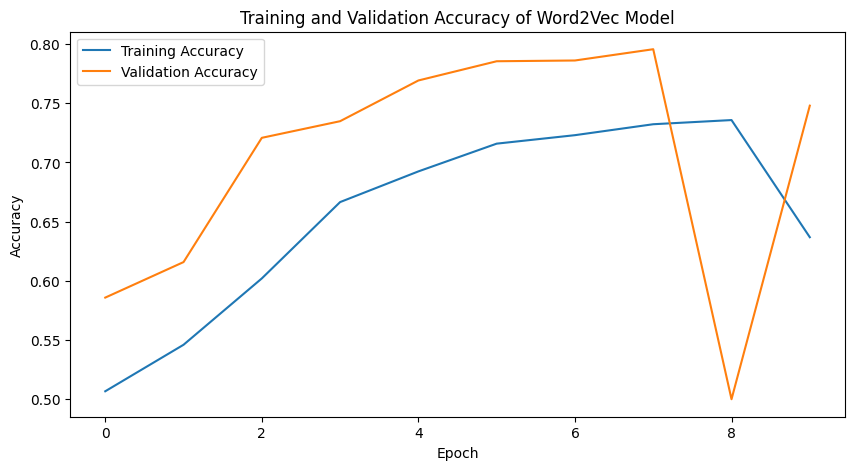

In [11]:
from matplotlib import pyplot as plt
# Plotting the training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy of Word2Vec Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<a id='model-evaluation'></a>
### Model Evaluation

Here's a summary of the model evaluation process:

- **Metrics**: We calculate various metrics to assess the performance of the Word2Vec model, including loss, accuracy, precision, recall, and AUC (Area Under the Curve).
  
- **Test Dataset**: We use a separate test dataset to evaluate the model's performance on unseen data, ensuring unbiased assessment.
  
- **Evaluation Results**: The model is evaluated using the test dataset, and the obtained metrics are presented, providing insights into its effectiveness in sentiment analysis.

- **Interpretation**: We interpret the evaluation results to understand how well the model generalizes to unseen data and its predictive capabilities.

- **Comparison**: Optionally, we may compare the performance of the Word2Vec model with other models or baselines to assess its relative effectiveness.

- **Conclusion**: Based on the evaluation outcomes, conclusions are drawn regarding the model's performance and potential areas for improvement.


In [12]:
# Evaluate model
loss_word2vec, accuracy_word2vec, precision_word2vec, recall_word2vec, auc_word2vec = model.evaluate(test_sequences, test_labels_binary)
print(f'Test Loss: {loss_word2vec}, Test Accuracy: {accuracy_word2vec}, Test Precision: {precision_word2vec}, Test Recall: {recall_word2vec}, Test AUC: {auc_word2vec}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 109s 140ms/step - accuracy: 0.7471 - auc: 0.8398 - loss: 0.5380 - precision: 0.6925 - recall: 0.8866
Test Loss: 0.537621021270752, Test Accuracy: 0.7479599714279175, Test Precision: 0.8411832451820374, Test Recall: 0.6926711201667786, Test AUC: 0.8914399743080139


782/782 ━━━━━━━━━━━━━━━━━━━━ 108s 138ms/step


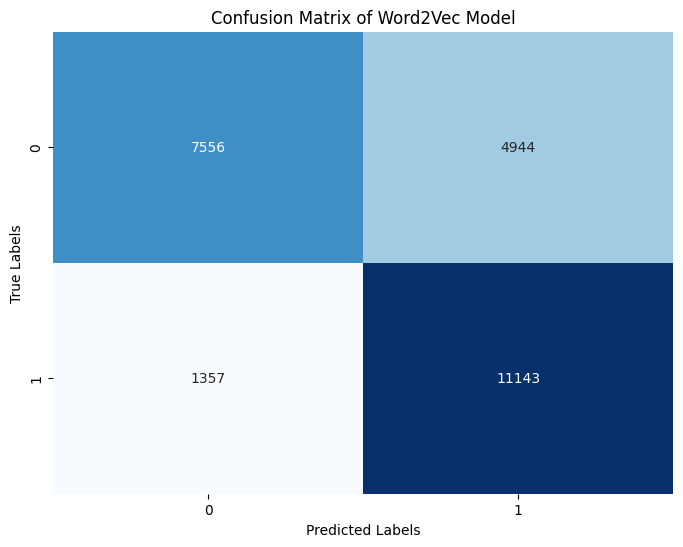

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict test labels
predictions = model.predict(test_sequences)
predicted_labels = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels

# Create confusion matrix
conf_matrix = confusion_matrix(test_labels_binary, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Word2Vec Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


<a id='building-fasttext-model'></a>
## Building FastText Model
<a id='data-preparation-fasttext'></a>
#### Data Preparation
We perform the following steps to prepare the data for training the FastText model:

1. **Loading FastText Model**: Load the pre-trained FastText model using the `FastText.load()` method.

2. **Tokenization and Conversion to Sequences**: Tokenize the text data and convert the tokens to sequences using the FastText model. For each tokenized text, we extract the corresponding word indices from the FastText vocabulary.

3. **Padding Sequences**: Pad the sequences to ensure uniform length for input data. We find the maximum sequence length in the training data and pad all sequences to match this length using the `pad_sequences` function from Keras.

4. **Determine Vocabulary Size and Embedding Dimension**: Calculate the vocabulary size and embedding dimension of the FastText model. The vocabulary size is determined by the number of unique words in the FastText model's vocabulary, and the embedding dimension corresponds to the size of the word vectors in the FastText model.



In [14]:
fasttext_model = FastText.load("model/fasttext_model.model")

# Convert tokens to sequences using FastText model
train_sequences_fasttext = [[fasttext_model.wv.key_to_index[word] for word in tokens if word in fasttext_model.wv.key_to_index] for tokens in train_tokens]
test_sequences_fasttext = [[fasttext_model.wv.key_to_index[word] for word in tokens if word in fasttext_model.wv.key_to_index] for tokens in test_tokens]

# Pad sequences
max_length = max(len(seq) for seq in train_sequences_fasttext)
train_sequences_fasttext = pad_sequences(train_sequences_fasttext, maxlen=max_length, padding='post')
test_sequences_fasttext = pad_sequences(test_sequences_fasttext, maxlen=max_length, padding='post')

# Determine vocabulary size and embedding dimension
vocab_size_fasttext = len(fasttext_model.wv.key_to_index)
embedding_dim_fasttext = fasttext_model.vector_size

<a id='model-architecture-fasttext'></a>

#### Mod Architecture andel Compilation

We compile the FastText model with the following architecture and configurations:

- **Architecture**: The model architecture consists of an embedding layer initialized with pre-trained FastText word vectors, followed by a Bidirectional LSTM layer with 64 units, and finally a Dense layer with a sigmoid activation function for binary classification.

- **Compilation**: The model is compiled using the Adam optimizer and binary cross-entropy loss function, suitable for binary classification tasks. We also specify the evaluation metrics to be used during training and validation, including binary accuracy, precision, recall, and AUC (Area Under the Curve).



In [15]:
model_fastText = Sequential([
    Embedding(input_dim=vocab_size_fasttext, output_dim=embedding_dim_fasttext, embeddings_initializer=tf.keras.initializers.Constant(fasttext_model.wv.vectors), trainable=False),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])
model_fastText.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

<a id='training-and-validation-fasttext'></a>

#### Training with Separate Validation Data

We train the FastText model using separate training and validation datasets. The model is trained for 10 epochs with a batch size of 32. During training, we monitor the accuracy and loss on both the training and validation sets to evaluate the model's performance and prevent overfitting

#### Training History Visualization

After training, we visualize the training and validation accuracy over the epochs using a line plot. This visualization helps us understand how the model's accuracy changes over time and identify any potential issues such as overfitting or underfitting.



In [16]:
# Train model with separate validation data
history_fastText = model_fastText.fit(train_sequences, train_labels_binary, epochs=10, batch_size=32, validation_data=(test_sequences, test_labels_binary))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1321s 2s/step - accuracy: 0.7623 - auc: 0.8441 - loss: 0.4811 - precision: 0.7175 - recall: 0.8657 - val_accuracy: 0.7433 - val_auc: 0.8714 - val_loss: 0.5185 - val_precision: 0.6662 - val_recall: 0.9751
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1492s 2s/step - accuracy: 0.8877 - auc: 0.9452 - loss: 0.2988 - precision: 0.8850 - recall: 0.8945 - val_accuracy: 0.8754 - val_auc: 0.9412 - val_loss: 0.3174 - val_precision: 0.8970 - val_recall: 0.8481
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1578s 2s/step - accuracy: 0.9415 - auc: 0.9797 - loss: 0.1725 - precision: 0.9395 - recall: 0.9430 - val_accuracy: 0.8584 - val_auc: 0.9376 - val_loss: 0.3601 - val_precision: 0.8163 - val_recall: 0.9250
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16454s 21s/step - accuracy: 0.9721 - auc: 0.9937 - loss: 0.0881 - precision: 0.9734 - recall: 0.9708 - val_accuracy: 0.8481 - val_auc: 0.9260 - val_loss: 0.4164 - val_precision: 0.8282 - val_recall: 0.8784
Epoch 5/10
782/782 ━━━

In [17]:
model_fastText.save('model/FastText_RNN_Model.keras')

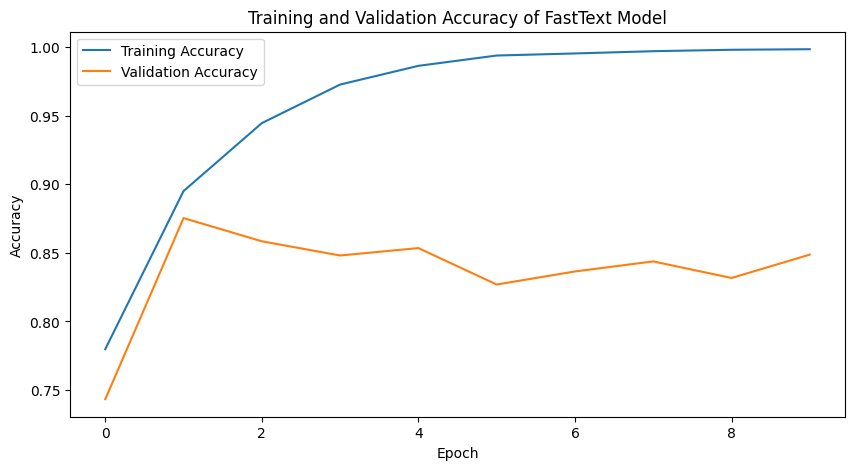

In [18]:
# Plotting the training history
plt.figure(figsize=(10, 5))
plt.plot(history_fastText.history['accuracy'], label='Training Accuracy')
plt.plot(history_fastText.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy of FastText Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<a id='model-evaluation-fasttext'></a>

#### Evaluation Metrics Calculation

We evaluate the trained FastText model on the test dataset to assess its performance. We calculate various metrics including loss, accuracy, precision, recall, and AUC (Area Under the Curve) to measure the model's classification performance

#### Confusion Matrix Visualization

Additionally, we generate a confusion matrix to visualize the performance of the model in terms of true positive, false positive, true negative, and false negative predictions. This visualization provides insights into the model's ability to correctly classify instances into their respective classes.


In [19]:
# Evaluate RNN model with FastText sequences
loss, accuracy, precision, recall, auc = model_fastText.evaluate(test_sequences_fasttext, test_labels_binary)
print(f'Test Loss (FastText): {loss}')
print(f'Test Accuracy (FastText): {accuracy}')
print(f'Test Precision (FastText): {precision}')
print(f'Test Recall (FastText): {recall}')
print(f'Test AUC (FastText): {auc}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 281s 360ms/step - accuracy: 0.8461 - auc: 0.8923 - loss: 0.8314 - precision: 0.8400 - recall: 0.8541
Test Loss (FastText): 0.8292060494422913
Test Accuracy (FastText): 0.8487200140953064
Test Precision (FastText): 0.8922722339630127
Test Recall (FastText): 0.8418823480606079
Test AUC (FastText): 0.8587200045585632


782/782 ━━━━━━━━━━━━━━━━━━━━ 284s 363ms/step


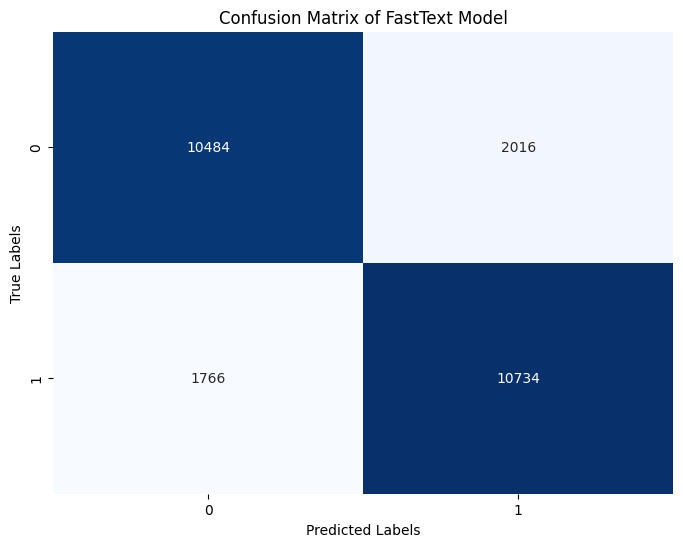

In [20]:
# Predict test labels
predictions = model_fastText.predict(test_sequences)
predicted_labels = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels

# Create confusion matrix
conf_matrix_fastText = confusion_matrix(test_labels_binary, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_fastText, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of FastText Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<a id='conclusion'></a>
# Conclusion

Based on the experimentation with Word2Vec and FastText models for sentiment analysis, the following conclusions can be drawn:

1. **Word2Vec Model Results**:
   - The Word2Vec model achieved increasing accuracy and AUC scores over epochs during training, indicating its learning capability.
   - The final test results for the Word2Vec model showed:
     - Test Loss: 0.5376
     - Test Accuracy: 74.80%
     - Test Precision: 84.12%
     - Test Recall: 69.27%
     - Test AUC: 89.14%

2. **FastText Model Results**:
   - The FastText model exhibited rapid convergence and high performance during training, reaching high accuracy and AUC scores.
   - The final test results for the FastText model were as follows:
     - Test Loss: 0.8292
     - Test Accuracy: 84.87%
     - Test Precision: 89.23%
     - Test Recall: 84.19%
     - Test AUC: 85.87%

3. **Comparison and Observations**:
   - Both models achieved competitive performance, with FastText slightly outperforming Word2Vec in terms of accuracy and precision.
   - FastText showed faster convergence and stable performance compared to Word2Vec.
   - The test results indicate that both models effectively learned the underlying sentiment patterns in the text data.

4. **Hyperparameters**:
   - For Word2Vec:
     - Vector size: 100
     - Window size: 5
     - Negative samples: 5
     - Epochs: 10
     - Dropout: 0.2
   - For FastText:
     - Vector size: 100
     - Window size: 5
     - Epochs: 10
     - Dropout: 0.2
   
These findings suggest that both Word2Vec and FastText are viable techniques for sentiment analysis tasks, with FastText demonstrating slightly superior performance in this specific experiment. Adjustments to hyperparameters and architecture could further optimize the performance of these models for sentiment analysis tasks.
